<a href="https://colab.research.google.com/github/skywalker0803r/Ricky/blob/master/CNN_stock_v12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install yfinance
#!pip install finta
#!pip install --upgrade pandas
#!pip install --upgrade pandas-datareader

# 載入資料

https://sharegpt.com/c/nwqFGKt

In [2]:
from pandas_datareader import data as pdr
import pandas as pd
import yfinance as yf
import seaborn as sns
yf.pdr_override()
y_symbols = ["^TWII"]
from datetime import datetime
startdate = datetime(2008,1,1)
enddate = datetime(2018,1,1)
df = pdr.get_data_yahoo(y_symbols, start=startdate, end=enddate)
print(df.shape)
display(df.head(3))
display(df.tail(3))

[*********************100%***********************]  1 of 1 completed
(2460, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,8491.570312,8532.919922,8319.580078,8323.049805,8323.017578,4372600
2008-01-03,8171.680176,8243.929688,8130.410156,8184.200195,8184.169434,3636400
2008-01-04,8134.040039,8247.179688,8097.850098,8221.099609,8221.067383,4603600


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-27,10419.809570,10497.769531,10419.809570,10486.669922,10486.669922,2103300
2017-12-28,10513.290039,10592.040039,10513.290039,10567.639648,10567.639648,2223700
2017-12-29,10590.950195,10659.980469,10590.950195,10642.860352,10642.860352,2411700


# Label triple_barrier

https://sharegpt.com/c/ARA034F

In [3]:
import pandas as pd
import numpy as np

def triple_barrier(price, ub, lb, max_period):
    def end_price(s):
        end = s.iloc[-1]
        for i in r:
            if s.iloc[i] >= ub:
                end = s.iloc[i]
                break
            elif s.iloc[i] <= lb:
                end = s.iloc[i]
                break
        return end / s.iloc[0]

    def end_time(s):
        for i in r:
            if s.iloc[i] >= ub or s.iloc[i] <= lb:
                return i
        return max_period - 1

    r = np.arange(max_period)
    signals = pd.DataFrame(index=price.index)
    signals['triple_barrier_signal'] = 0
    signals['end_time'] = 0
    signals['end_price'] = 0.0

    for i in range(max_period, len(price)):
        window = price.iloc[i-max_period:i]
        signals.loc[window.index[-1], 'triple_barrier_signal'] = np.sign(window.iloc[-1] - window.iloc[0])
        signals.loc[window.index[-1], 'end_time'] = end_time(window)
        signals.loc[window.index[-1], 'end_price'] = end_price(window)

    return signals
ret = triple_barrier(df.Close,1.03,0.97,20)['triple_barrier_signal']
df = df.join(ret)


In [4]:
df.tail(20)

,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal
Date,,,,,,,
2017-12-04,10617.269531,10665.429688,10565.679688,10651.110352,10651.110352,2864500,-1
2017-12-05,10607.620117,10635.709961,10540.740234,10566.849609,10566.849609,3126100,-1
2017-12-06,10541.030273,10541.030273,10376.650391,10393.919922,10393.919922,3022600,-1
2017-12-07,10404.419922,10418.969727,10322.759766,10355.759766,10355.759766,2740500,-1
2017-12-08,10406.349609,10419.280273,10336.259766,10398.620117,10398.620117,2683800,-1
2017-12-11,10438.330078,10504.669922,10438.330078,10473.089844,10473.089844,2334200,-1
2017-12-12,10488.730469,10495.240234,10408.059570,10443.280273,10443.280273,2164400,-1
2017-12-13,10447.110352,10489.169922,10444.700195,10470.700195,10470.700195,2324000,-1
2017-12-14,10494.599609,10577.530273,10494.599609,10538.009766,10538.009766,2447400,-1


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='triple_barrier_signal', ylabel='count'>

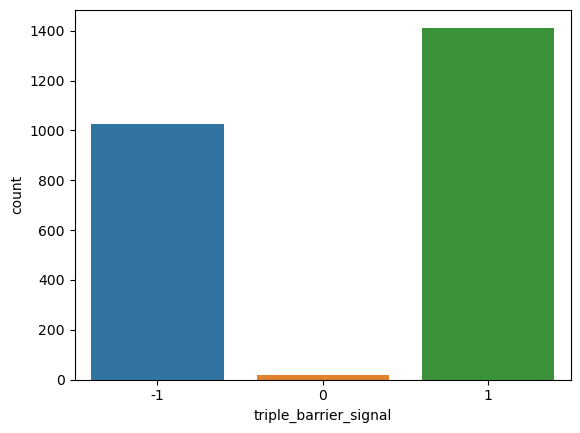

In [5]:
df['triple_barrier_signal'].value_counts()
sns.countplot(df['triple_barrier_signal'])

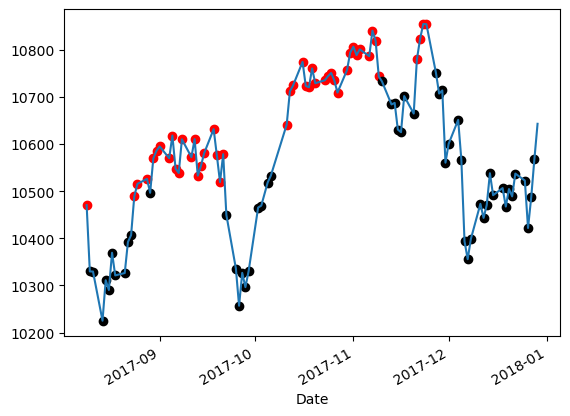

In [6]:
import matplotlib.pyplot as plt

df_recent = df.tail(100)
buy = df_recent[df_recent['triple_barrier_signal']==1]['Close']
sell = df_recent[df_recent['triple_barrier_signal']==-1]['Close']
df_recent['Close'].plot()#後20筆是前20筆的驗證
plt.scatter(buy.index,buy.values,color='red')
plt.scatter(sell.index,sell.values,color='black')
plt.show()

# 建立ohlcv

In [7]:
from finta import TA
ohlcv = df[['Open','High','Low','Close','Volume']]
ohlcv.columns = ['open','high','low','close','volume']

# 計算技術指標RSI

https://sharegpt.com/c/lXPO7as

count    2459.000000
mean       52.417916
std        12.466840
min         0.000000
25%        43.744877
50%        53.730395
75%        61.648139
max        82.366855
Name: RSI, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI
Date,,,,,,,,
2017-12-25,10546.639648,10556.650391,10514.540039,10522.490234,10522.490234,1928200,-1,46.982290
2017-12-26,10526.139648,10528.919922,10408.120117,10421.910156,10421.910156,2037800,-1,40.079557
2017-12-27,10419.809570,10497.769531,10419.809570,10486.669922,10486.669922,2103300,-1,45.619532
2017-12-28,10513.290039,10592.040039,10513.290039,10567.639648,10567.639648,2223700,-1,51.639889
2017-12-29,10590.950195,10659.980469,10590.950195,10642.860352,10642.860352,2411700,0,56.462099


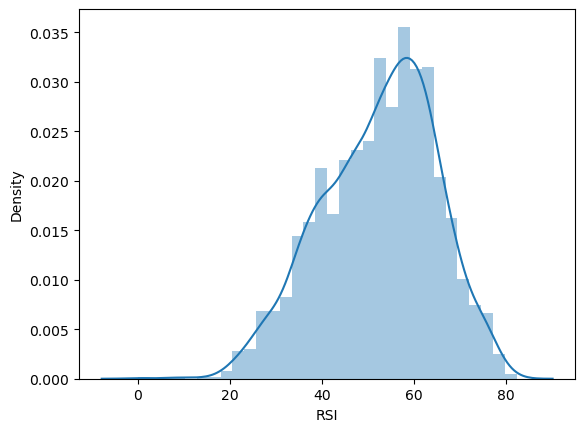

In [8]:
df['RSI'] = TA.RSI(ohlcv)
print(df['RSI'].describe())
sns.distplot(df['RSI'].dropna())
df.tail()

# 計算威廉指標

count    2447.000000
mean      -42.924834
std        32.106224
min      -100.000000
25%       -72.366535
50%       -37.833875
75%       -12.696184
max        -0.000000
Name: Williams %R, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R
Date,,,,,,,,,
2017-12-25,10546.639648,10556.650391,10514.540039,10522.490234,10522.490234,1928200,-1,46.982290,-21.603772
2017-12-26,10526.139648,10528.919922,10408.120117,10421.910156,10421.910156,2037800,-1,40.079557,-61.082469
2017-12-27,10419.809570,10497.769531,10419.809570,10486.669922,10486.669922,2103300,-1,45.619532,-37.659121
2017-12-28,10513.290039,10592.040039,10513.290039,10567.639648,10567.639648,2223700,-1,51.639889,-13.262490
2017-12-29,10590.950195,10659.980469,10590.950195,10642.860352,10642.860352,2411700,0,56.462099,-6.795830


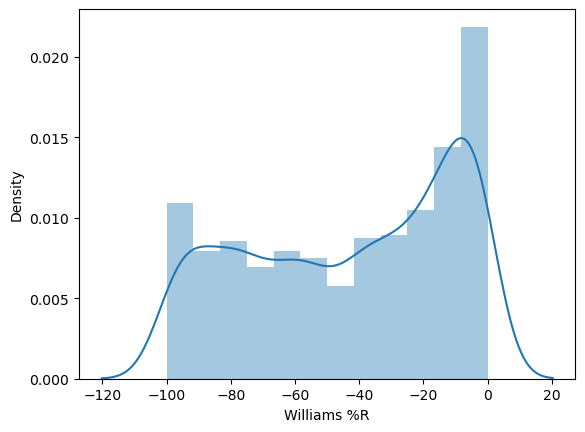

In [9]:
df['Williams %R'] = TA.WILLIAMS(ohlcv)
print(df['Williams %R'].describe())
sns.distplot(df['Williams %R'].dropna())
df.tail()

# SMA

count     2420.000000
mean      8187.849451
std       1239.758738
min       4461.422953
25%       7552.656461
50%       8264.875155
75%       8936.812298
max      10724.666611
Name: SMA, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA
Date,,,,,,,,,,
2017-12-25,10546.639648,10556.650391,10514.540039,10522.490234,10522.490234,1928200,-1,46.982290,-21.603772,10641.792397
2017-12-26,10526.139648,10528.919922,10408.120117,10421.910156,10421.910156,2037800,-1,40.079557,-61.082469,10633.622642
2017-12-27,10419.809570,10497.769531,10419.809570,10486.669922,10486.669922,2103300,-1,45.619532,-37.659121,10626.131669
2017-12-28,10513.290039,10592.040039,10513.290039,10567.639648,10567.639648,2223700,-1,51.639889,-13.262490,10620.309213
2017-12-29,10590.950195,10659.980469,10590.950195,10642.860352,10642.860352,2411700,0,56.462099,-6.795830,10616.756788


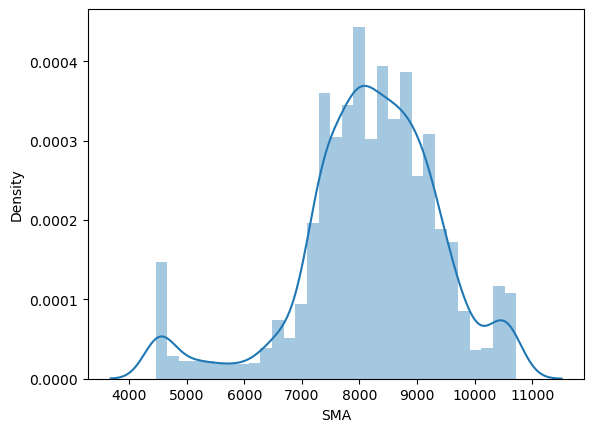

In [10]:
df['SMA'] = TA.SMA(ohlcv)
print(df['SMA'].describe())
sns.distplot(df['SMA'].dropna())
df.tail()

# EMA

count     2460.000000
mean      8201.439153
std       1259.387464
min       4300.800227
25%       7569.214574
50%       8259.723404
75%       8995.867193
max      10791.876951
Name: EMA, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA
Date,,,,,,,,,,,
2017-12-25,10546.639648,10556.650391,10514.540039,10522.490234,10522.490234,1928200,-1,46.982290,-21.603772,10641.792397,10507.420018
2017-12-26,10526.139648,10528.919922,10408.120117,10421.910156,10421.910156,2037800,-1,40.079557,-61.082469,10633.622642,10490.318046
2017-12-27,10419.809570,10497.769531,10419.809570,10486.669922,10486.669922,2103300,-1,45.619532,-37.659121,10626.131669,10489.588421
2017-12-28,10513.290039,10592.040039,10513.290039,10567.639648,10567.639648,2223700,-1,51.639889,-13.262490,10620.309213,10505.198666
2017-12-29,10590.950195,10659.980469,10590.950195,10642.860352,10642.860352,2411700,0,56.462099,-6.795830,10616.756788,10532.731003


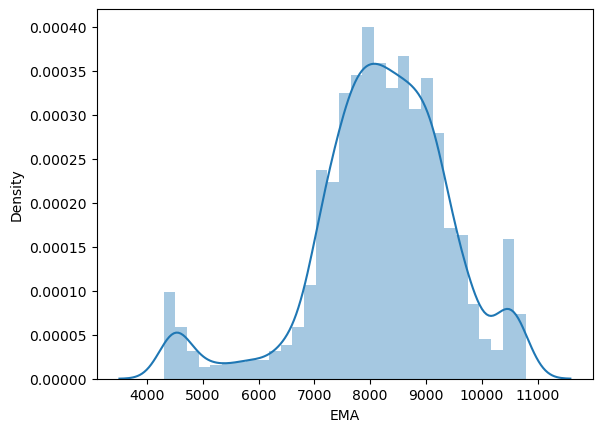

In [11]:
df['EMA'] = TA.EMA(ohlcv)
print(df['EMA'].describe())
sns.distplot(df['EMA'])
df.tail()

# WMA

count     2452.000000
mean      8202.912974
std       1265.513809
min       4234.718896
25%       7570.094189
50%       8271.370009
75%       9010.896701
max      10803.862695
Name: WMA, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA
Date,,,,,,,,,,,,
2017-12-25,10546.639648,10556.650391,10514.540039,10522.490234,10522.490234,1928200,-1,46.982290,-21.603772,10641.792397,10507.420018,10507.428711
2017-12-26,10526.139648,10528.919922,10408.120117,10421.910156,10421.910156,2037800,-1,40.079557,-61.082469,10633.622642,10490.318046,10491.204991
2017-12-27,10419.809570,10497.769531,10419.809570,10486.669922,10486.669922,2103300,-1,45.619532,-37.659121,10626.131669,10489.588421,10489.017448
2017-12-28,10513.290039,10592.040039,10513.290039,10567.639648,10567.639648,2223700,-1,51.639889,-13.262490,10620.309213,10505.198666,10504.164735
2017-12-29,10590.950195,10659.980469,10590.950195,10642.860352,10642.860352,2411700,0,56.462099,-6.795830,10616.756788,10532.731003,10532.662847


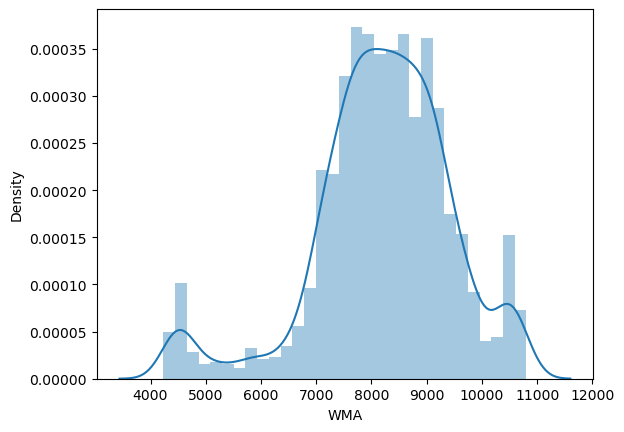

In [12]:
df['WMA'] = TA.WMA(ohlcv)
print(df['WMA'].describe())
sns.distplot(df['WMA'].dropna())
df.tail()

# HMA

count     2442.000000
mean      8205.515655
std       1276.347771
min       4094.401396
25%       7555.372267
50%       8290.720515
75%       9022.529098
max      10819.708422
Name: HMA, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA
Date,,,,,,,,,,,,,
2017-12-25,10546.639648,10556.650391,10514.540039,10522.490234,10522.490234,1928200,-1,46.982290,-21.603772,10641.792397,10507.420018,10507.428711,10516.495069
2017-12-26,10526.139648,10528.919922,10408.120117,10421.910156,10421.910156,2037800,-1,40.079557,-61.082469,10633.622642,10490.318046,10491.204991,10509.968476
2017-12-27,10419.809570,10497.769531,10419.809570,10486.669922,10486.669922,2103300,-1,45.619532,-37.659121,10626.131669,10489.588421,10489.017448,10502.198036
2017-12-28,10513.290039,10592.040039,10513.290039,10567.639648,10567.639648,2223700,-1,51.639889,-13.262490,10620.309213,10505.198666,10504.164735,10504.374446
2017-12-29,10590.950195,10659.980469,10590.950195,10642.860352,10642.860352,2411700,0,56.462099,-6.795830,10616.756788,10532.731003,10532.662847,10524.930876


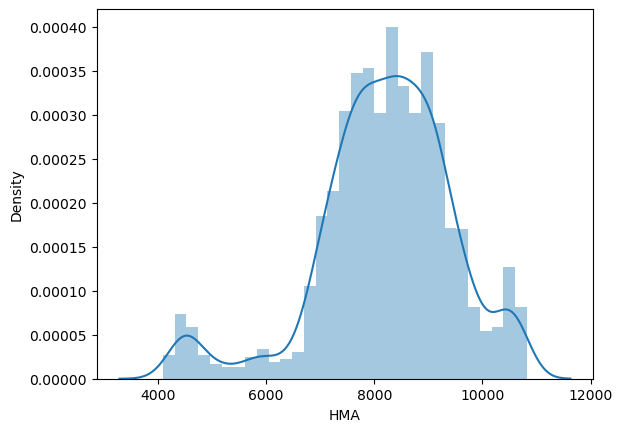

In [13]:
df['HMA'] = TA.HMA(ohlcv)
print(df['HMA'].describe())
sns.distplot(df['HMA'].dropna())
df.tail()

# TEMA

count     2460.000000
mean      8205.207962
std       1270.540517
min       4104.984137
25%       7561.502482
50%       8285.133609
75%       9017.397927
max      10844.010084
Name: TEMA, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA
Date,,,,,,,,,,,,,,
2017-12-25,10546.639648,10556.650391,10514.540039,10522.490234,10522.490234,1928200,-1,46.982290,-21.603772,10641.792397,10507.420018,10507.428711,10516.495069,10526.649246
2017-12-26,10526.139648,10528.919922,10408.120117,10421.910156,10421.910156,2037800,-1,40.079557,-61.082469,10633.622642,10490.318046,10491.204991,10509.968476,10481.906056
2017-12-27,10419.809570,10497.769531,10419.809570,10486.669922,10486.669922,2103300,-1,45.619532,-37.659121,10626.131669,10489.588421,10489.017448,10502.198036,10484.662396
2017-12-28,10513.290039,10592.040039,10513.290039,10567.639648,10567.639648,2223700,-1,51.639889,-13.262490,10620.309213,10505.198666,10504.164735,10504.374446,10526.113374
2017-12-29,10590.950195,10659.980469,10590.950195,10642.860352,10642.860352,2411700,0,56.462099,-6.795830,10616.756788,10532.731003,10532.662847,10524.930876,10589.012642


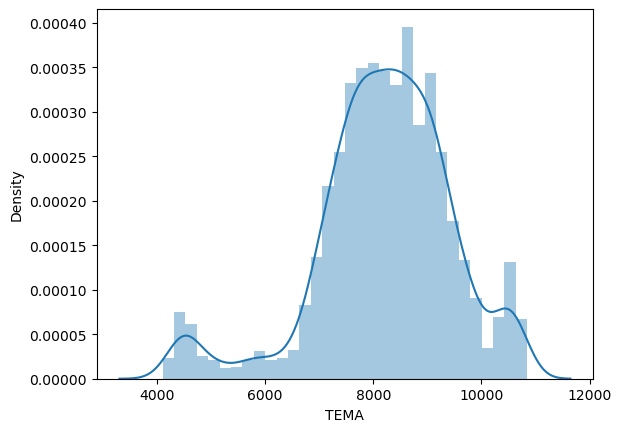

In [14]:
df['TEMA'] = TA.TEMA(ohlcv)
print(df['TEMA'].describe())
sns.distplot(df['TEMA'].dropna())
df.tail()

# CCI

count    2459.000000
mean       14.349753
std       110.612723
min      -367.416775
25%       -72.162511
50%        32.576118
75%       100.920866
max       347.439300
Name: CCI, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI
Date,,,,,,,,,,,,,,,
2017-12-25,10546.639648,10556.650391,10514.540039,10522.490234,10522.490234,1928200,-1,46.982290,-21.603772,10641.792397,10507.420018,10507.428711,10516.495069,10526.649246,7.282462
2017-12-26,10526.139648,10528.919922,10408.120117,10421.910156,10421.910156,2037800,-1,40.079557,-61.082469,10633.622642,10490.318046,10491.204991,10509.968476,10481.906056,-61.917234
2017-12-27,10419.809570,10497.769531,10419.809570,10486.669922,10486.669922,2103300,-1,45.619532,-37.659121,10626.131669,10489.588421,10489.017448,10502.198036,10484.662396,-38.602349
2017-12-28,10513.290039,10592.040039,10513.290039,10567.639648,10567.639648,2223700,-1,51.639889,-13.262490,10620.309213,10505.198666,10504.164735,10504.374446,10526.113374,84.215903
2017-12-29,10590.950195,10659.980469,10590.950195,10642.860352,10642.860352,2411700,0,56.462099,-6.795830,10616.756788,10532.731003,10532.662847,10524.930876,10589.012642,173.067905


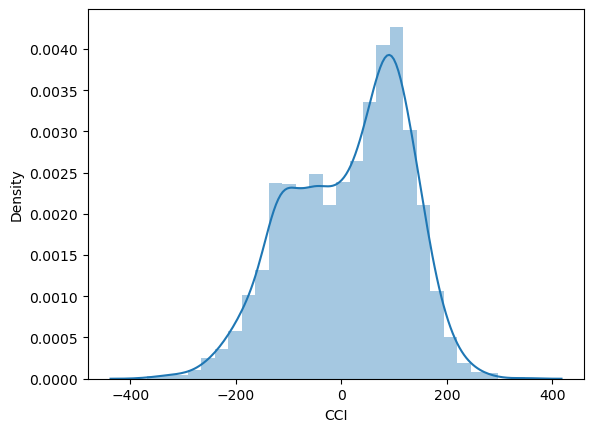

In [15]:
df['CCI'] = TA.CCI(ohlcv)
print(df['CCI'].describe())
sns.distplot(df['CCI'].dropna())
df.tail()

# CMO

count    2459.000000
mean        5.274091
std        29.484764
min      -100.000000
25%       -15.693263
50%         8.110343
75%        27.086731
max        78.416508
Name: CMO, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO
Date,,,,,,,,,,,,,,,,
2017-12-25,10546.639648,10556.650391,10514.540039,10522.490234,10522.490234,1928200,-1,46.982290,-21.603772,10641.792397,10507.420018,10507.428711,10516.495069,10526.649246,7.282462,-2.993545
2017-12-26,10526.139648,10528.919922,10408.120117,10421.910156,10421.910156,2037800,-1,40.079557,-61.082469,10633.622642,10490.318046,10491.204991,10509.968476,10481.906056,-61.917234,-22.984737
2017-12-27,10419.809570,10497.769531,10419.809570,10486.669922,10486.669922,2103300,-1,45.619532,-37.659121,10626.131669,10489.588421,10489.017448,10502.198036,10484.662396,-38.602349,-7.182685
2017-12-28,10513.290039,10592.040039,10513.290039,10567.639648,10567.639648,2223700,-1,51.639889,-13.262490,10620.309213,10505.198666,10504.164735,10504.374446,10526.113374,84.215903,9.051570
2017-12-29,10590.950195,10659.980469,10590.950195,10642.860352,10642.860352,2411700,0,56.462099,-6.795830,10616.756788,10532.731003,10532.662847,10524.930876,10589.012642,173.067905,21.348261


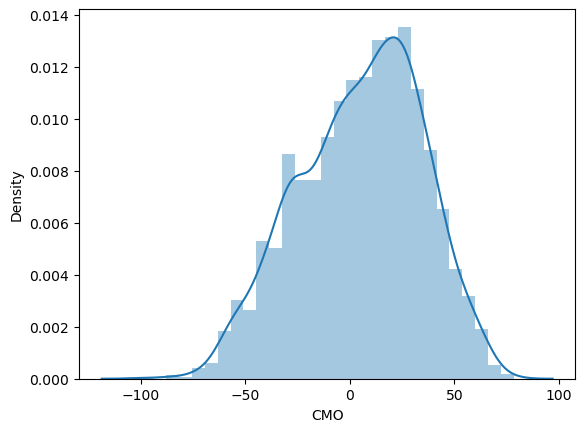

In [16]:
df['CMO'] = TA.CMO(ohlcv)
print(df['CMO'].describe())
sns.distplot(df['CMO'].dropna())
df.tail()

# MACD

count    2460.000000
mean       -0.058717
std        28.228319
min      -129.904255
25%       -17.753264
50%         0.246709
75%        17.864463
max        84.181016
Name: MACD, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD
Date,,,,,,,,,,,,,,,,,
2017-12-25,10546.639648,10556.650391,10514.540039,10522.490234,10522.490234,1928200,-1,46.982290,-21.603772,10641.792397,10507.420018,10507.428711,10516.495069,10526.649246,7.282462,-2.993545,9.576779
2017-12-26,10526.139648,10528.919922,10408.120117,10421.910156,10421.910156,2037800,-1,40.079557,-61.082469,10633.622642,10490.318046,10491.204991,10509.968476,10481.906056,-61.917234,-22.984737,4.439872
2017-12-27,10419.809570,10497.769531,10419.809570,10486.669922,10486.669922,2103300,-1,45.619532,-37.659121,10626.131669,10489.588421,10489.017448,10502.198036,10484.662396,-38.602349,-7.182685,5.588858
2017-12-28,10513.290039,10592.040039,10513.290039,10567.639648,10567.639648,2223700,-1,51.639889,-13.262490,10620.309213,10505.198666,10504.164735,10504.374446,10526.113374,84.215903,9.051570,11.639231
2017-12-29,10590.950195,10659.980469,10590.950195,10642.860352,10642.860352,2411700,0,56.462099,-6.795830,10616.756788,10532.731003,10532.662847,10524.930876,10589.012642,173.067905,21.348261,20.051112


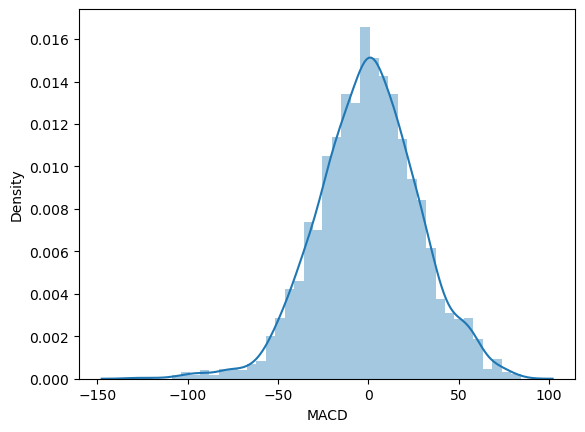

In [17]:
df['MACD'] = TA.MACD(ohlcv)['MACD'] - TA.MACD(ohlcv)['SIGNAL']
print(df['MACD'].describe())
sns.distplot(df['MACD'].dropna())
df.tail()

# PPO

count    2460.000000
mean       -0.000528
std         0.380524
min        -1.548843
25%        -0.221020
50%        -0.003705
75%         0.213415
max         1.519703
Name: PPO, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO
Date,,,,,,,,,,,,,,,,,,
2017-12-25,10546.639648,10556.650391,10514.540039,10522.490234,10522.490234,1928200,-1,46.982290,-21.603772,10641.792397,10507.420018,10507.428711,10516.495069,10526.649246,7.282462,-2.993545,9.576779,0.089871
2017-12-26,10526.139648,10528.919922,10408.120117,10421.910156,10421.910156,2037800,-1,40.079557,-61.082469,10633.622642,10490.318046,10491.204991,10509.968476,10481.906056,-61.917234,-22.984737,4.439872,0.041042
2017-12-27,10419.809570,10497.769531,10419.809570,10486.669922,10486.669922,2103300,-1,45.619532,-37.659121,10626.131669,10489.588421,10489.017448,10502.198036,10484.662396,-38.602349,-7.182685,5.588858,0.052011
2017-12-28,10513.290039,10592.040039,10513.290039,10567.639648,10567.639648,2223700,-1,51.639889,-13.262490,10620.309213,10505.198666,10504.164735,10504.374446,10526.113374,84.215903,9.051570,11.639231,0.109662
2017-12-29,10590.950195,10659.980469,10590.950195,10642.860352,10642.860352,2411700,0,56.462099,-6.795830,10616.756788,10532.731003,10532.662847,10524.930876,10589.012642,173.067905,21.348261,20.051112,0.189713


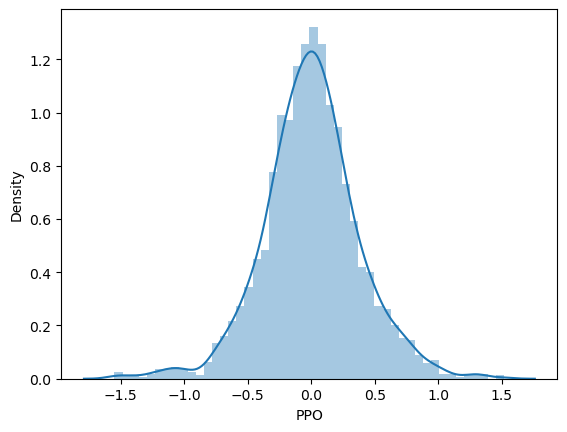

In [18]:
df['PPO'] = TA.PPO(ohlcv)['PPO'] - TA.PPO(ohlcv)['SIGNAL']
print(df['PPO'].describe())
sns.distplot(df['PPO'].dropna())
df.tail()

# ROC

count    2448.000000
mean        0.211112
std         4.098768
min       -18.792148
25%        -1.779389
50%         0.493387
75%         2.570880
max        17.166721
Name: ROC, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC
Date,,,,,,,,,,,,,,,,,,,
2017-12-25,10546.639648,10556.650391,10514.540039,10522.490234,10522.490234,1928200,-1,46.982290,-21.603772,10641.792397,10507.420018,10507.428711,10516.495069,10526.649246,7.282462,-2.993545,9.576779,0.089871,1.610026
2017-12-26,10526.139648,10528.919922,10408.120117,10421.910156,10421.910156,2037800,-1,40.079557,-61.082469,10633.622642,10490.318046,10491.204991,10509.968476,10481.906056,-61.917234,-22.984737,4.439872,0.041042,0.223972
2017-12-27,10419.809570,10497.769531,10419.809570,10486.669922,10486.669922,2103300,-1,45.619532,-37.659121,10626.131669,10489.588421,10489.017448,10502.198036,10484.662396,-38.602349,-7.182685,5.588858,0.052011,0.129666
2017-12-28,10513.290039,10592.040039,10513.290039,10567.639648,10567.639648,2223700,-1,51.639889,-13.262490,10620.309213,10505.198666,10504.164735,10504.374446,10526.113374,84.215903,9.051570,11.639231,0.109662,1.190808
2017-12-29,10590.950195,10659.980469,10590.950195,10642.860352,10642.860352,2411700,0,56.462099,-6.795830,10616.756788,10532.731003,10532.662847,10524.930876,10589.012642,173.067905,21.348261,20.051112,0.189713,1.644209


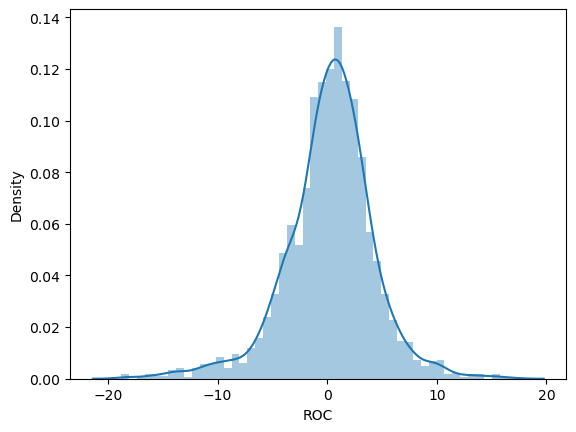

In [19]:
df['ROC'] = TA.ROC(ohlcv)
print(df['ROC'].describe())
sns.distplot(df['ROC'].dropna())
df.tail()

# CMFI

count    2.451000e+03
mean     1.172032e+10
std      6.140979e+09
min     -8.174941e+09
25%      1.045729e+10
50%      1.362012e+10
75%      1.555405e+10
max      1.915761e+10
Name: CFI, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI
Date,,,,,,,,,,,,,,,,,,,,
2017-12-25,10546.639648,10556.650391,10514.540039,10522.490234,10522.490234,1928200,-1,46.982290,-21.603772,10641.792397,10507.420018,10507.428711,10516.495069,10526.649246,7.282462,-2.993545,9.576779,0.089871,1.610026,1.807963e+10
2017-12-26,10526.139648,10528.919922,10408.120117,10421.910156,10421.910156,2037800,-1,40.079557,-61.082469,10633.622642,10490.318046,10491.204991,10509.968476,10481.906056,-61.917234,-22.984737,4.439872,0.041042,0.223972,1.804399e+10
2017-12-27,10419.809570,10497.769531,10419.809570,10486.669922,10486.669922,2103300,-1,45.619532,-37.659121,10626.131669,10489.588421,10489.017448,10502.198036,10484.662396,-38.602349,-7.182685,5.588858,0.052011,0.129666,1.803959e+10
2017-12-28,10513.290039,10592.040039,10513.290039,10567.639648,10567.639648,2223700,-1,51.639889,-13.262490,10620.309213,10505.198666,10504.164735,10504.374446,10526.113374,84.215903,9.051570,11.639231,0.109662,1.190808,1.806873e+10
2017-12-29,10590.950195,10659.980469,10590.950195,10642.860352,10642.860352,2411700,0,56.462099,-6.795830,10616.756788,10532.731003,10532.662847,10524.930876,10589.012642,173.067905,21.348261,20.051112,0.189713,1.644209,1.812555e+10


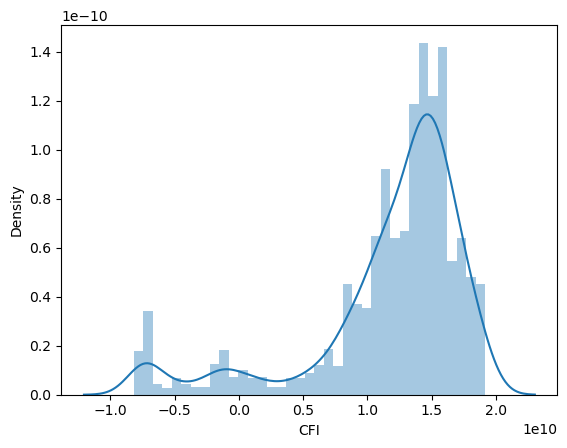

In [20]:
df['CFI'] = TA.CFI(ohlcv)
print(df['CFI'].describe())
sns.distplot(df['CFI'].dropna())
df.tail()

# DMI

count    2447.000000
mean       -1.033866
std        16.612481
min      -104.815244
25%       -11.904644
50%         0.852670
75%        10.715588
max        43.725256
Name: DMI, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,...,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI
Date,,,,,,,,,,,,,,,,,,,,,
2017-12-25,10546.639648,10556.650391,10514.540039,10522.490234,10522.490234,1928200,-1,46.982290,-21.603772,10641.792397,...,10507.428711,10516.495069,10526.649246,7.282462,-2.993545,9.576779,0.089871,1.610026,1.807963e+10,-6.638386
2017-12-26,10526.139648,10528.919922,10408.120117,10421.910156,10421.910156,2037800,-1,40.079557,-61.082469,10633.622642,...,10491.204991,10509.968476,10481.906056,-61.917234,-22.984737,4.439872,0.041042,0.223972,1.804399e+10,-15.923384
2017-12-27,10419.809570,10497.769531,10419.809570,10486.669922,10486.669922,2103300,-1,45.619532,-37.659121,10626.131669,...,10489.017448,10502.198036,10484.662396,-38.602349,-7.182685,5.588858,0.052011,0.129666,1.803959e+10,-14.785999
2017-12-28,10513.290039,10592.040039,10513.290039,10567.639648,10567.639648,2223700,-1,51.639889,-13.262490,10620.309213,...,10504.164735,10504.374446,10526.113374,84.215903,9.051570,11.639231,0.109662,1.190808,1.806873e+10,-5.117221
2017-12-29,10590.950195,10659.980469,10590.950195,10642.860352,10642.860352,2411700,0,56.462099,-6.795830,10616.756788,...,10532.662847,10524.930876,10589.012642,173.067905,21.348261,20.051112,0.189713,1.644209,1.812555e+10,1.534119


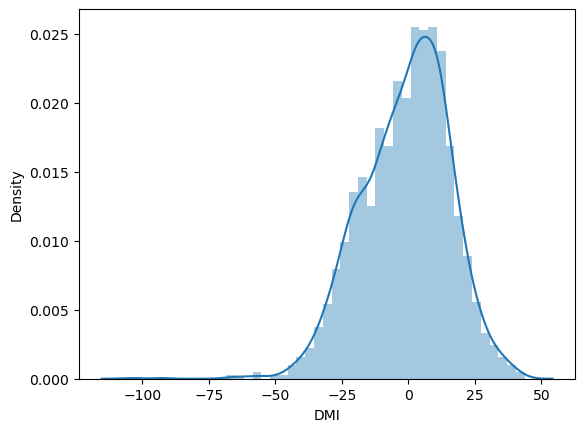

In [21]:
df['DMI'] = TA.DMI(ohlcv)['DI+'] - TA.DMI(ohlcv)['DI-']
print(df['DMI'].describe())
sns.distplot(df['DMI'].dropna())
df.tail()

# SAR

count     2460.000000
mean      8180.121106
std       1277.077206
min       3955.429932
25%       7534.953917
50%       8251.577206
75%       8989.067065
max      10882.650391
Name: SAR, dtype: float64


c:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,Open,High,Low,Close,Adj Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,...,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI,SAR
Date,,,,,,,,,,,,,,,,,,,,,
2017-12-25,10546.639648,10556.650391,10514.540039,10522.490234,10522.490234,1928200,-1,46.982290,-21.603772,10641.792397,...,10516.495069,10526.649246,7.282462,-2.993545,9.576779,0.089871,1.610026,1.807963e+10,-6.638386,10322.759766
2017-12-26,10526.139648,10528.919922,10408.120117,10421.910156,10421.910156,2037800,-1,40.079557,-61.082469,10633.622642,...,10509.968476,10481.906056,-61.917234,-22.984737,4.439872,0.041042,0.223972,1.804399e+10,-15.923384,10322.759766
2017-12-27,10419.809570,10497.769531,10419.809570,10486.669922,10486.669922,2103300,-1,45.619532,-37.659121,10626.131669,...,10502.198036,10484.662396,-38.602349,-7.182685,5.588858,0.052011,0.129666,1.803959e+10,-14.785999,10332.115391
2017-12-28,10513.290039,10592.040039,10513.290039,10567.639648,10567.639648,2223700,-1,51.639889,-13.262490,10620.309213,...,10504.374446,10526.113374,84.215903,9.051570,11.639231,0.109662,1.190808,1.806873e+10,-5.117221,10341.096791
2017-12-29,10590.950195,10659.980469,10590.950195,10642.860352,10642.860352,2411700,0,56.462099,-6.795830,10616.756788,...,10524.930876,10589.012642,173.067905,21.348261,20.051112,0.189713,1.644209,1.812555e+10,1.534119,10356.153386


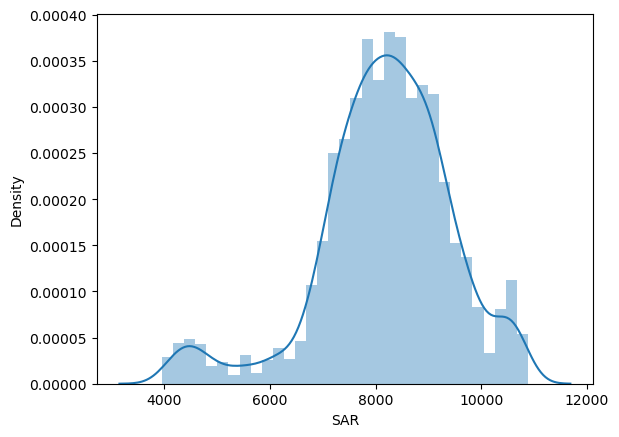

In [22]:
df['SAR'] = TA.SAR(ohlcv)
print(df['SAR'].describe())
sns.distplot(df['SAR'].dropna())
df.tail()

# columns選取

In [23]:
print(df.shape)
df = df.dropna(axis=0)#刪除有缺失的row,會缺失主要因為用時間rolling計算技術指標導致,正常的
features = ['RSI','Williams %R','SMA','EMA','WMA','HMA','TEMA','CCI','CMO','MACD','PPO','ROC','CFI','DMI','SAR']
y_name = 'triple_barrier_signal' #當作labels
df = df[features+[y_name]]
print(df.shape)
df.tail()

(2460, 22)
(2420, 16)


,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI,SAR,triple_barrier_signal
Date,,,,,,,,,,,,,,,,
2017-12-25,46.982290,-21.603772,10641.792397,10507.420018,10507.428711,10516.495069,10526.649246,7.282462,-2.993545,9.576779,0.089871,1.610026,1.807963e+10,-6.638386,10322.759766,-1
2017-12-26,40.079557,-61.082469,10633.622642,10490.318046,10491.204991,10509.968476,10481.906056,-61.917234,-22.984737,4.439872,0.041042,0.223972,1.804399e+10,-15.923384,10322.759766,-1
2017-12-27,45.619532,-37.659121,10626.131669,10489.588421,10489.017448,10502.198036,10484.662396,-38.602349,-7.182685,5.588858,0.052011,0.129666,1.803959e+10,-14.785999,10332.115391,-1
2017-12-28,51.639889,-13.262490,10620.309213,10505.198666,10504.164735,10504.374446,10526.113374,84.215903,9.051570,11.639231,0.109662,1.190808,1.806873e+10,-5.117221,10341.096791,-1
2017-12-29,56.462099,-6.795830,10616.756788,10532.731003,10532.662847,10524.930876,10589.012642,173.067905,21.348261,20.051112,0.189713,1.644209,1.812555e+10,1.534119,10356.153386,0


# features scaling

In [24]:
from sklearn.preprocessing import MinMaxScaler
import pickle
min_max_scaler = MinMaxScaler()
df_minmax = df.copy()
df_minmax[features] = min_max_scaler.fit_transform(df_minmax[features])#縮放到0-1之間
with open('scaler.pkl', 'wb') as f:
    pickle.dump(min_max_scaler, f)
df_minmax.tail()

,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI,SAR,triple_barrier_signal
Date,,,,,,,,,,,,,,,,
2017-12-25,0.511389,0.783962,0.986768,0.956177,0.954875,0.954915,0.952907,0.524160,0.506249,0.651521,0.534036,0.567375,0.960561,0.538775,0.919175,-1
2017-12-26,0.416072,0.389175,0.985464,0.953543,0.952405,0.953944,0.946268,0.427358,0.385002,0.627526,0.518123,0.528830,0.959256,0.453744,0.919175,-1
2017-12-27,0.492571,0.623409,0.984268,0.953430,0.952072,0.952789,0.946677,0.459973,0.480842,0.632893,0.521698,0.526207,0.959096,0.464160,0.920526,-1
2017-12-28,0.575704,0.867375,0.983338,0.955835,0.954378,0.953112,0.952827,0.631781,0.579302,0.661155,0.540486,0.555717,0.960162,0.552706,0.921822,-1
2017-12-29,0.642292,0.932042,0.982771,0.960077,0.958716,0.956169,0.962161,0.756075,0.653882,0.700447,0.566573,0.568326,0.962241,0.613618,0.923996,0


In [25]:
df = df_minmax
print('特徵縮放完成!')

特徵縮放完成!


# Xs ,ys prepare

https://sharegpt.com/c/KcXGMUL

In [26]:
from tqdm import tqdm
import numpy as np

#定義觀察天數,起始index(0),結束index(資料筆數-觀察天數)
days = 15
start_index = 0
end_index = len(df)-days

#特徵欄位
features = df.drop(y_name,axis=1).columns.tolist()

#待存放序列
Xs = []
ys = []
indexs = []

'''
若資料筆數100,days=15天,f_index=85,i只會跑到84,i+days=99,features只會跑到98天.
若資料筆數100,days=15天,f_index=85+1,i會跑到85,i+days=100,features會跑到99天.
'''
for i in tqdm(range(start_index ,end_index+1 ,1)):#每次i都會遞增1
  X = df.iloc[i:i+days,:][features] #ex:0...14(不含15)之features
  y = df.iloc[i+days-1:i+days,:][y_name]#ex:14,y_name
  X = np.array(X) # to np_array
  Xs.append(X) #加入一筆X
  ys.append(y) #加入一筆y
  indexs.append((df.iloc[[i]].index,df.iloc[[i+days-1]].index)) #加入資料日期
#轉換成np_array
Xs = np.array(Xs)
ys = np.array(ys)
print('準備完成')

100%|██████████| 2406/2406 [00:02<00:00, 827.06it/s]

準備完成


# check

In [27]:
print('資料筆數:',len(Xs))
print('第一筆的index開始和結束:{}-{}'.format(indexs[0][0].date[0],indexs[0][1].date[0]))
print('最後一筆的index開始和結束:{}-{}'.format(indexs[-1][0].date[0],indexs[-1][1].date[0]))

資料筆數: 2406
第一筆的index開始和結束:2008-03-07-2008-03-27
最後一筆的index開始和結束:2017-12-11-2017-12-29


# Reshape X

(圖片數量,長,寬,1張)

In [28]:
print(Xs.shape)
Xs = Xs.reshape(-1,days,len(features),1)
print(Xs.shape)

(2406, 15, 15)
(2406, 15, 15, 1)


# One hot encoding of label

原始y代表漲幅

In [29]:
print(ys.shape)
print(ys[:5])

from keras.utils.np_utils import to_categorical
ys = to_categorical(ys, num_classes = 3)
print(ys.shape)
print(ys[:5])

(2406, 1)
[[ 1]
 [ 1]
 [ 1]
 [-1]
 [-1]]
(2406, 3)
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


# Visualization

https://sharegpt.com/c/lQ0OLk6

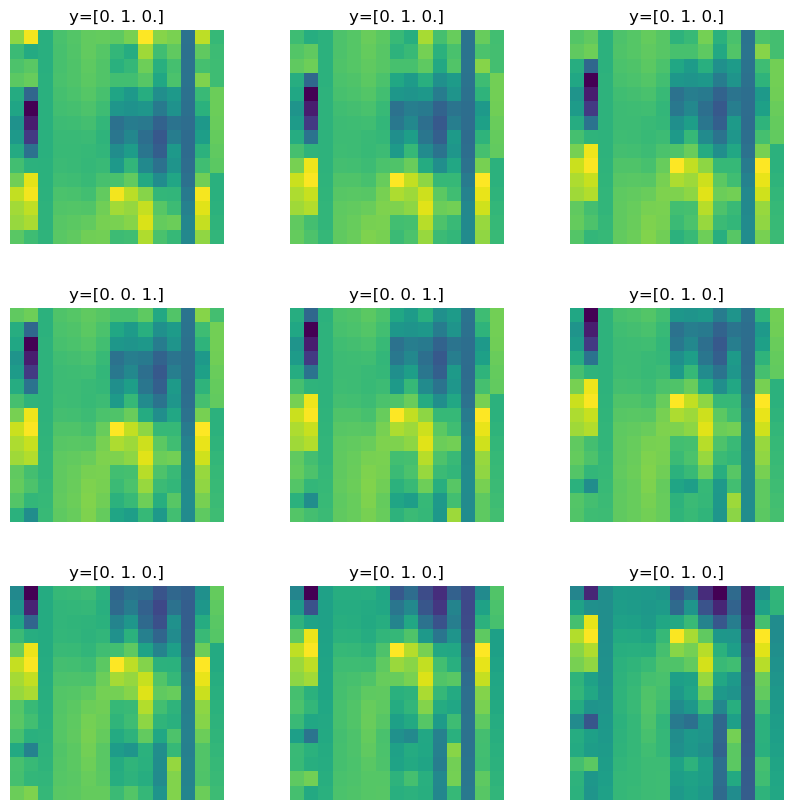

In [32]:
import matplotlib.pyplot as plt

# n为batch大小，这里设为9
n = 9

# 生成一个九宫格的画布
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

# 遍历batch中的每一个样本，依次画出对应的矩阵和标注
for i in range(n):
    # 获取当前样本的矩阵和标注
    x = Xs[i]
    y = ys[i]
    
    # 在对应的子图上画出矩阵和标注
    axs[i//3, i%3].imshow(x)
    axs[i//3, i%3].set_title('y={}'.format(y))
    axs[i//3, i%3].axis('off')

# 调整子图之间的距离
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# 显示画布
plt.show()


# Split training and test sets

In [ ]:
X_test = Xs[-40:] #最後40天features當作test資料
X_train,y_train = Xs[:-40],ys[:-40] #其他當作訓練
print(X_train.shape,y_train.shape,X_test.shape)

(2366, 15, 15, 1) (2366, 3) (40, 15, 15, 1)


# 調整採樣

https://sharegpt.com/c/Vm1VcLs

In [ ]:
X_train2維 = X_train.reshape(X_train.shape[0],-1)
y_train數字 = np.array([ np.argmax(i) for i in y_train])
print(X_train2維.shape)
print(y_train數字.shape)

from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler()
X_train平衡 ,y_train平衡 = ros.fit_resample(X_train2維 ,y_train數字)
print(pd.DataFrame(y_train平衡)[0].value_counts().sort_index())#顯示結果

X_train = X_train平衡.reshape(X_train平衡.shape[0],15,15,1)#資料數,15,15,1
y_train = y_train平衡.reshape(y_train平衡.shape[0],1)#資料數,1
y_train = to_categorical(y_train , num_classes = 3)#one_hot
print(X_train.shape)
print(y_train.shape)

(2366, 225)
(2366,)
1    983
2    983
Name: 0, dtype: int64
(1966, 15, 15, 1)
(1966, 3)


# Split training and val sets

https://sharegpt.com/c/ZgCDypE

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xval, ytrain, yval = train_test_split(
    X_train,
    y_train, 
    test_size = 0.2,
    random_state = 42,
    shuffle = True,#是否洗牌
    stratify = y_train #是否根據y欄位做分層取樣
    )
print(xtrain.shape, ytrain.shape, xval.shape, yval.shape)

(1572, 15, 15, 1) (1572, 3) (394, 15, 15, 1) (394, 3)


# 看一下樣本的label分布情況是否平均(待解決)

0:Hold,1:Buy,2:Sell

In [ ]:
pd.Series([np.argmax(i) for i in ys]).value_counts()

1    1391
2    1014
0       1
dtype: int64

In [ ]:
pd.Series([np.argmax(i) for i in y_train]).value_counts()

1    983
2    983
dtype: int64

In [ ]:
pd.Series([np.argmax(i) for i in ytrain]).value_counts()

2    786
1    786
dtype: int64

In [ ]:
pd.Series([np.argmax(i) for i in yval]).value_counts()

2    197
1    197
dtype: int64

# CNN

In [ ]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPool2D, AvgPool2D
from tensorflow.keras.optimizers import Adam #做梯度下降的一種優化方法
from keras.callbacks import ReduceLROnPlateau , EarlyStopping #減少學習速率 on Plateau

In [ ]:
nclasses = 3 
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(15,15,1)))#15,15,32
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu',))#15,15,64
model.add(MaxPool2D(pool_size=(5,5)))# 3,3,64
model.add(Flatten())#576
model.add(Dropout(0.5))#288
model.add(Dense(128, activation='relu'))#128
model.add(Dropout(0.5))#64
model.add(Dense(32, activation='relu'))#32
model.add(Dropout(0.5))#16
model.add(Dense(nclasses, activation='softmax'))#3
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 15, 15, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 64)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dropout (Dropout)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 128)               73856     
                                                        

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# 優化器

In [ ]:
#1
lr_reduction = ReduceLROnPlateau(
    monitor = 'val_acc', 
    factor=0.5, 
    patience = 3, 
    verbose = 1, 
    min_lr = 0.00001)

#2
es = EarlyStopping(monitor='val_acc',#驗證集acc
                   min_delta=0.1, 
                   patience=10,  
                   mode='max',
                   restore_best_weights=True)#恢復最佳權重

# fit

In [ ]:
history = model.fit(
    xtrain,
    ytrain,
    batch_size = 128,
    epochs = 500,
    validation_data=(xval,yval),
    verbose=1,callbacks=[es]
    )

Epoch 1/500
13/13 [==============================] - 3s 73ms/step - loss: 0.9382 - accuracy: 0.4771 - val_loss: 0.7181 - val_accuracy: 0.7335
Epoch 2/500
13/13 [==============================] - 1s 47ms/step - loss: 0.7931 - accuracy: 0.5013 - val_loss: 0.7168 - val_accuracy: 0.5000
Epoch 3/500
13/13 [==============================] - 1s 48ms/step - loss: 0.7540 - accuracy: 0.5337 - val_loss: 0.6813 - val_accuracy: 0.6574
Epoch 4/500
13/13 [==============================] - 1s 46ms/step - loss: 0.7200 - accuracy: 0.5483 - val_loss: 0.6529 - val_accuracy: 0.7690
Epoch 5/500
13/13 [==============================] - 1s 47ms/step - loss: 0.6774 - accuracy: 0.5999 - val_loss: 0.5871 - val_accuracy: 0.8604
Epoch 6/500
13/13 [==============================] - 1s 54ms/step - loss: 0.6237 - accuracy: 0.6648 - val_loss: 0.4646 - val_accuracy: 0.8579
Epoch 7/500
13/13 [==============================] - 1s 45ms/step - loss: 0.5219 - accuracy: 0.7615 - val_loss: 0.3724 - val_accuracy: 0.8604
Epoch 

# 訓練過程評估

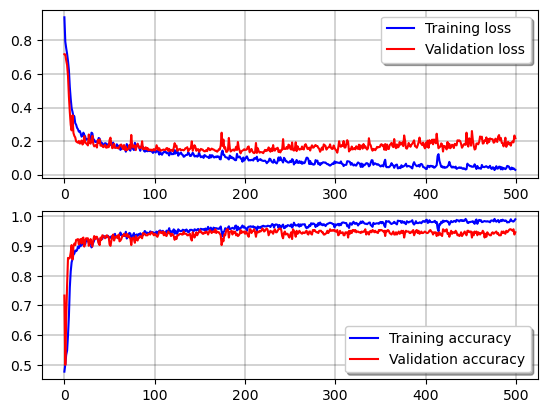

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
ax[0].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[1].legend(loc='best', shadow=True)

# 混淆矩陣

13/13 [==============================] - 0s 4ms/step


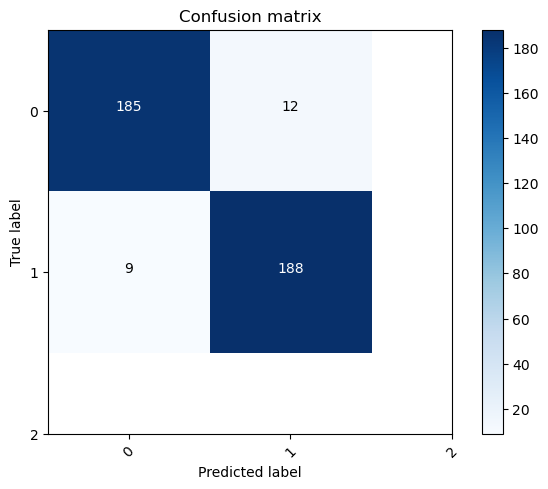

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#預測的y
ypred_onehot = model.predict(xval)
#轉換預測的y: [0 0 1 0 0 ...] --> 2
ypred = np.argmax(ypred_onehot,axis=1)
#轉換真實的y
ytrue = np.argmax(yval,axis=1)
#計算 confusion matrix
confusion_mtx = confusion_matrix(ytrue, ypred)
#畫出 confusion matrix
plot_confusion_matrix(confusion_mtx, classes=range(nclasses))

# 分類report

轉換預測結果

In [ ]:
y_pred = model.predict(xval)
y_pred = [np.argmax(i) for i in y_pred]
y_pred = to_categorical(y_pred, num_classes = 3)
print(y_pred[:5])

13/13 [==============================] - 0s 4ms/step
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]


真實y值

In [ ]:
print(yval[:5])

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]


# 分類報告

In [ ]:
def 勝率(yval,y_pred):
  t = []
  for i,j in zip(yval,y_pred):
    t.append(np.allclose(i,j))
  return np.mean(t)
勝率(yval,y_pred)

0.9467005076142132

In [ ]:
from sklearn.metrics import classification_report 
target_names = ['Hold','BUY','SELL']
print(classification_report(yval,y_pred,target_names=target_names))

              precision    recall  f1-score   support

        Hold       0.00      0.00      0.00         0
         BUY       0.95      0.94      0.95       197
        SELL       0.94      0.95      0.95       197

   micro avg       0.95      0.95      0.95       394
   macro avg       0.63      0.63      0.63       394
weighted avg       0.95      0.95      0.95       394
 samples avg       0.95      0.95      0.95       394



c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Administrator\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# plot error

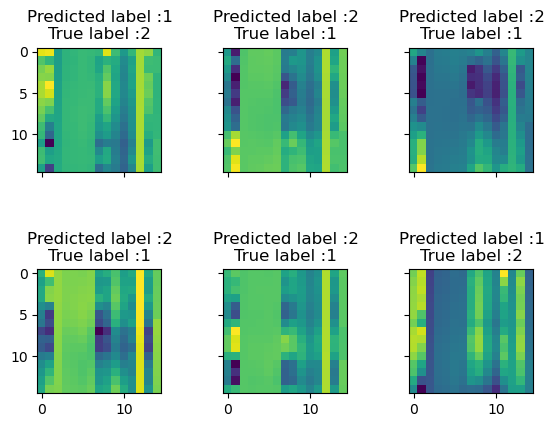

In [ ]:
errors = (ypred - ytrue != 0)

ypred_er = ypred_onehot[errors]
ypred_classes_er = ypred[errors]
ytrue_er = ytrue[errors]
xval_er = xval[errors]

def display_errors(errors_index, img_errors, pred_errors, obs_errors):
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows, ncols, sharex=True, sharey=True)
    plt.subplots_adjust(wspace =0.5, hspace =0.5)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((days,len(features))))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1
            
# 錯誤預測的概率
ypred_er_prob = np.max(ypred_er,axis=1)

# Predicted probabilities of the true values in the error set
true_prob_er = np.diagonal(np.take(ypred_er, ytrue_er, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_er = ypred_er_prob - true_prob_er

# Sorted list of the delta prob errors
sorted_delta_er = np.argsort(delta_pred_true_er)

# Top 6 errors. You can change the range to see other images
most_important_er = sorted_delta_er[-6:]

# Show the top 6 errors
display_errors(most_important_er, xval_er, ypred_classes_er, ytrue_er)

## 測試集預測

In [ ]:
answer = model.predict(X_test)
answer = [ np.argmax(i) for i in answer]
print(len(answer))

2/2 [==============================] - 0s 4ms/step
40


# 預測結果

[*********************100%***********************]  1 of 1 completed


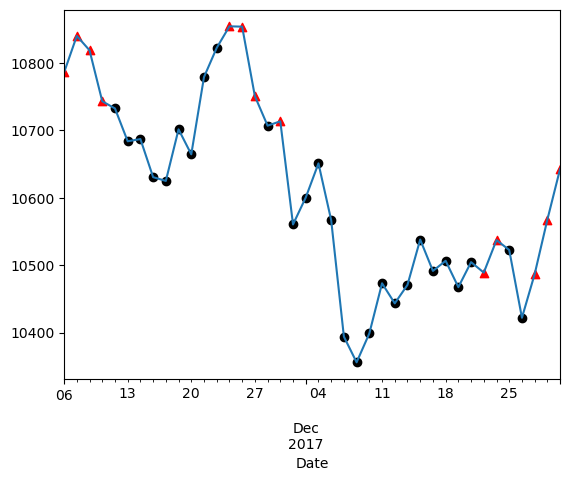

In [ ]:
C = pd.DataFrame()
C['Close'] = pdr.get_data_yahoo(y_symbols, start=startdate, end=enddate)['Close']
C['SIGNAL'] = 0
C = C.tail(len(answer))
C['SIGNAL'] = answer 
buy = C[C['SIGNAL']==1]['Close']
sell = C[C['SIGNAL']==2]['Close']
C['Close'].plot()
plt.scatter(list(buy.index),list(buy.values),color='red',marker="^")
plt.scatter(list(sell.index),list(sell.values),color='black')

In [ ]:
import pandas as pd
# Set the float_format option to not use scientific notation
pd.set_option('display.float_format', '{:.4f}'.format)
np.set_printoptions(suppress=True)
C['HOLD%'] = model.predict(X_test)[:,0]
C['BUY%'] = model.predict(X_test)[:,1]
C['SELL%'] = model.predict(X_test)[:,2]
C.drop(['SIGNAL'],axis=1).tail(20)

2/2 [==============================] - 0s 4ms/step


,Close,HOLD%,BUY%,SELL%
Date,,,,
2017-12-04,10651.1104,0.0000,0.0000,1.0000
2017-12-05,10566.8496,0.0000,0.0000,1.0000
2017-12-06,10393.9199,0.0000,0.0000,1.0000
2017-12-07,10355.7598,0.0000,0.0000,1.0000
2017-12-08,10398.6201,0.0000,0.0000,1.0000
2017-12-11,10473.0898,0.0000,0.0000,1.0000
2017-12-12,10443.2803,0.0000,0.0000,1.0000
2017-12-13,10470.7002,0.0000,0.0000,1.0000
2017-12-14,10538.0098,0.0000,0.0001,0.9999


# save model

In [ ]:
model.save('model.h5')
del model

In [ ]:
from keras.models import load_model
model = load_model('model.h5')
predict = model.predict(X_test)

2/2 [==============================] - 0s 3ms/step


In [ ]:
predict[-5:]

array([[0.0012417 , 0.46453238, 0.53422594],
       [0.00144562, 0.43569544, 0.56285894],
       [0.00064268, 0.8768165 , 0.12254076],
       [0.00005448, 0.9617176 , 0.03822788],
       [0.00000043, 0.996163  , 0.00383647]], dtype=float32)